In [1]:
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
import scipy
import json
import pickle

import tuner_library
import utilities as util
import matplotlib.pyplot as plt

In [2]:
#ask user to input the name of classes and store it in classNames as a json
class_names = ['atheism', 'christian']
class_names = json.dumps(class_names)

#converting json to array object which will be used by the code further
class_names = json.loads(class_names)
print(class_names)

#get the text from the user in the string form(not json)
text = 'From: crackle!dabbott@munnari.oz.au (NAME)\nSubject: "Why I am not Bertrand Russell" (2nd request)\nReply-To: dabbott@augean.eleceng.adelaide.edu.au (Derek Abbott)\nOrganization: Electrical & Electronic Eng., University of Adelaide\nLines: 4\n\nCould the guy who wrote the article "Why I am not Bertrand Russell"\nresend me a copy?\n\nSorry, I accidently deleted my copy and forgot your name.\n'

['atheism', 'christian']


In [3]:
from tuner_library import tuner
tl = tuner(text,'model.pkl', class_names)
result = util.JsonToArray(tl.get_Prediction()) 
result

HII


array([[0.274, 0.726]])

In [4]:
#ask user to input the value of sigma and store it in sigma as a json
sigma = 25
sigma = json.dumps(sigma)

#converting json to array object which will be used by the code further
sigma = json.loads(sigma)
sigma

25

In [5]:
#get the explanation for a particular sigma (all the explanation fields are filled)
exp = tl.get_Explanation(sigma)
print(exp.rf_score)
exp.save_to_file('explanation_25.html')

sigma = 25
0.00021752590931620926


In [6]:
k = 0.39062499968
tl.sigmas = k*2**np.arange(13)

In [7]:
for sigma in tl.sigmas:
    exp = tl.get_Explanation(sigma)    

sigma = 0.39062499968
sigma = 0.78124999936
sigma = 1.56249999872
sigma = 3.12499999744
sigma = 6.24999999488
sigma = 12.49999998976
sigma = 24.99999997952
sigma = 49.99999995904
sigma = 99.99999991808
sigma = 199.99999983616
sigma = 399.99999967232
sigma = 799.99999934464
sigma = 1599.99999868928


In [8]:
#for plotting entropy v/s sigma curve
sigmas, entropies = tl.get_Sigma_Entropy()
#get the rmse values(all the explanation models) for all the sigmas 
sigmas,constant_rmse, linear_rmse, decisionTree_rmse, randomForest_rmse = tl.get_RMSEs_And_Sigmas()

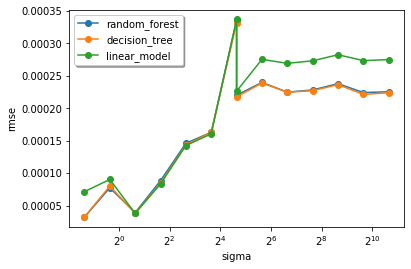

In [9]:
#plot the sigma v/s rmses 
axes=plt.gca()

plt.xscale('log', basex = 2)
plt.xlabel("sigma")
plt.ylabel("rmse");

plt.plot(sigmas, randomForest_rmse,'-o',label = 'random_forest')
plt.plot(sigmas, decisionTree_rmse,'-o',label = 'decision_tree')
plt.plot(sigmas, linear_rmse,'-o', label = 'linear_model')
# plt.plot(width, constant_rmse,'-o',label = 'constant_model')
# plt.suptitle('Example id = ' + str(idx))

legend = plt.legend(loc='upper left', shadow=True)

legend.get_frame()

#plot the sigma v/s rmses 
# axes=plt.gca()

# plt.xscale('log', basex = 2)
# plt.xlabel("sigma")
# plt.ylabel("rmse");

# plt.plot(sigmas[0:4], randomForest_rmse[0:4],'-o',label = 'random_forest')
# plt.plot(sigmas[0:4], decisionTree_rmse[0:4],'-o',label = 'decision_tree')
# plt.plot(sigmas[0:4], linear_rmse[0:4],'-o', label = 'linear_model')
# plt.plot(sigmas[0:4], constant_rmse[0:4],'-o',label = 'constant_model')
# # plt.suptitle('Example id = ' + str(idx))

# legend = plt.legend(loc='upper left', shadow=True)

# legend.get_frame()

1599.99999868928


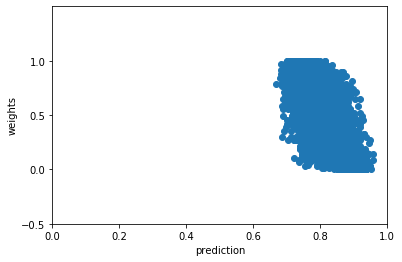

In [10]:
#for plotting weight distribution of neighbourhood points for a particular sigma
weights, predictions = tl.get_Weight_Distribution_Plot_Per_Sigma(25)

#plot the weight distribution of neighbour points for a particular sigma
axes=plt.gca()
plt.ylabel("weights")
plt.xlabel("prediction");
plt.ylim(-0.5, 1.5)
major_ticks = np.arange(-0.5, 1.5, 0.5)
axes.set_yticks(major_ticks) 
plt.xlim(0,1)
print(sigma)
plt.plot(predictions, weights,'o')

In [11]:

print(tl.getRange_Constant_Model())
print(tl.getRange_Linear_Model())

[0.39, 0.39062499968]
[0.39062499968, 12.49999998976]


In [13]:
print(linear_rmse)
print(randomForest_rmse)

[7.135328179408154e-05, 9.02263554490488e-05, 3.7834107882539535e-05, 8.330490947867511e-05, 0.0001424372701663256, 0.00016050682716581177, 0.000336833136343794, 0.00022631297697013616, 0.0002753112537641294, 0.0002691676967573745, 0.00027308855637931247, 0.00028244664146131283, 0.0002733506353935214, 0.00027500116759056505]
[3.2140799016128124e-05, 7.722555973902299e-05, 3.904443571890854e-05, 8.83637468396734e-05, 0.0001459540184738249, 0.0001629723712994496, 0.00033575320765038213, 0.00022000377079402924, 0.0002397706480957936, 0.00022477003679894215, 0.00022818716490469762, 0.00023790083946474924, 0.00022408878702503775, 0.0002253798310663006]
